Santiago Esteban Jurado Agudelo //
Sebastian Velez Puerta//
Mateo Almeida Gomez//

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
### LIBRERIAS
#@title Librerias { run: "auto" }
## librerias para el funcionamiento del paquete

import numpy as np
import matplotlib.pyplot as plt
import math
#%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import scipy.stats as stats
import pylab 
import warnings
warnings.filterwarnings("ignore", message="""Caught 'unbalanced parenthesis at position 119' compiling regex""", category=UserWarning )
from scipy.optimize import fmin
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl
from scipy.special import factorial

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import KBinsDiscretizer
# Bin continuous data into intervals.
from sklearn.base import BaseEstimator, TransformerMixin
from numpy.lib.shape_base import apply_over_axes

from scipy.stats import norm
from sklearn.neighbors import KernelDensity

import scipy

import os
import sys
import pandas as pd
# import pandas_datareader.data as web

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

from statsmodels.tsa import ar_model, arima_process, arima, arima_model
from statsmodels.tsa.ar_model import AutoReg
#!pip install numpy scipy patsy pandas
#!pip install statsmodels --upgrade

<ipython-input-1-3196dc68cab9>:46: UserWarning: DelftStack
  warnings.warn('DelftStack')


In [2]:
class MVE():

  def __init__(self,X_function_estimate: np.array,plot=True,hist=True):
    
    self.X_function_estimate=X_function_estimate
    self.plot=plot
    self.hist=hist
    self.N=len(self.X_function_estimate)

  def Exponential(self,lambda_limits:np.array,espace : float =0.10):

    lambdas = np.arange(lambda_limits[0], lambda_limits[1], espace)
    log_estimation=self.N*np.log(lambdas)-lambdas*np.sum(self.X_function_estimate)
    posicionmax=np.where( log_estimation== np.amax(log_estimation))
    lambda_estimate=lambdas[posicionmax]
    estimated_exponential=np.random.exponential(1/lambda_estimate,size=self.N)
    if(self.plot):
      plt.figure(figsize=(6,6))
      plt.plot(lambdas, log_estimation)
      plt.xlabel('$\lambda$')
      plt.ylabel('log likely hood')
      plt.plot(lambda_estimate,log_estimation[posicionmax],color="green",label="Lambda Estimated: {}".format(lambda_estimate),marker='o')
      plt.legend()
      plt.show()
    if(self.hist):
      Nbins = int(1 + 3.322*np.log2(self.N))
      plt.figure(figsize=(8,8))
      plt.hist(self.X_function_estimate,bins=Nbins,color="orange",label="Original")
      plt.hist(estimated_exponential,bins=Nbins,color="blue",label="Estimation-lambda{}".format(lambda_estimate))
      plt.legend()
      plt.title("original and estimated comparison")
    
    return lambda_estimate,estimated_exponential

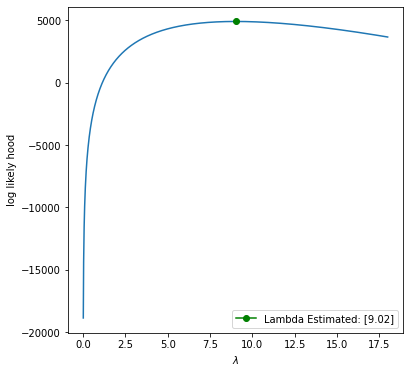

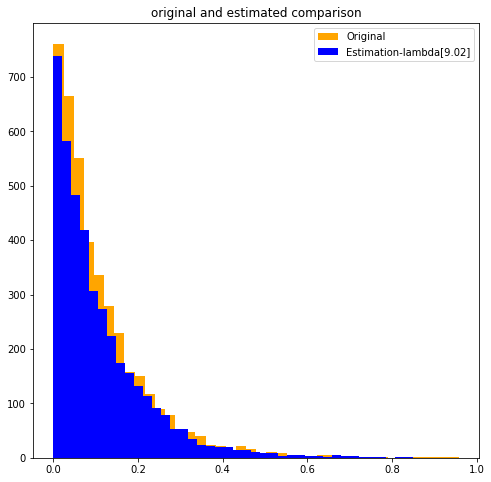

In [7]:
# Exponential
 
N =  4096 # // numero de muestras 

  #   parameter vector \theta=\lambda - Mean = 1/(\lambda)
parameter = 9  
mean  = 1/parameter
x = np.random.exponential(mean, N) ## FDP Exponencial real   
MLE1=MVE(x) ## TENGO MIS DATOS GUARDADOS 
Values_limit = np.array([0.01,parameter*2]) ##Límites para la función 
espace=0.01
lambda_estimate,exponential_estimate=MLE1.Exponential(Values_limit,espace)

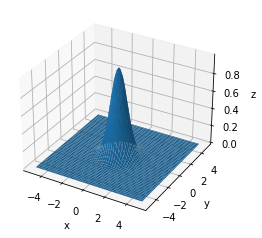

In [4]:
def exp3d(x, y):
    return np.exp(-(x**2 + y**2))

# Generamos los datos para la gráfica
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = exp3d(X, Y)

# Creamos la figura y los ejes en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Creamos la gráfica en 3D
ax.plot_surface(X, Y, Z)

# Añadimos etiquetas a los ejes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Mostramos la gráfica
plt.show()

In [27]:
class MFE():

   def __init__(self,X_function_estimate: np.array,plot=True,hist=True):
    
    self.X_function_estimate=X_function_estimate
    self.plot=plot
    self.hist=hist
    self.N=len(self.X_function_estimate)
    
   def Uniform(self,vectorA, vectorb, n):
     ## GENERAMOS VECTOR DE A Y B
     A = np.linspace(vectorA[0], vectorA[1], n)
     B = np.linspace(vectorb[0], vectorb[1], n)
     A, B = np.meshgrid(A, B) ## GENERO LAS COMBINACIONES POSIBLES PARA A Y B
     log = -self.N*np.log(B-A)
     posicionmax=np.where( log== np.amax(log))
     A_estimate=A[posicionmax[0],posicionmax[1]]
     B_estimate=B[posicionmax[0],posicionmax[1]]
     ## GENERAMOS LA UNIFORME ESTIMADA
     UniformEstimate= np.random.uniform(A_estimate,B_estimate,self.N); 
     if(self.plot):
      fig=pl.figure(figsize=(6,6))
      ax=Axes3D(fig)
      ax.plot_surface(A,B,log)
      pl.title("log likely hood of uniform [A and B] ")
      pl.show()
      if(self.hist):
        Nbins = int(1 + 3.322*np.log2(self.N))
        plt.figure(figsize=(8,8))
        plt.hist(self.X_function_estimate,bins=Nbins,color="orange",label="Original")
        plt.hist(UniformEstimate,bins=Nbins,color="blue",label="Estimation-A {}-B {}".format(A_estimate,B_estimate))
        plt.legend()
        plt.title("original and estimated comparison")
        plt.show()
     return A_estimate,B_estimate,UniformEstimate

<ipython-input-27-f06ec464a48b>:23: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)


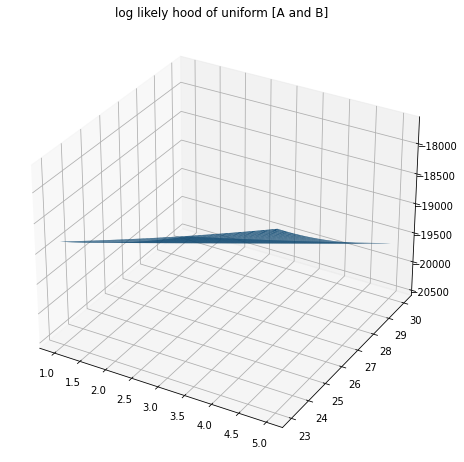

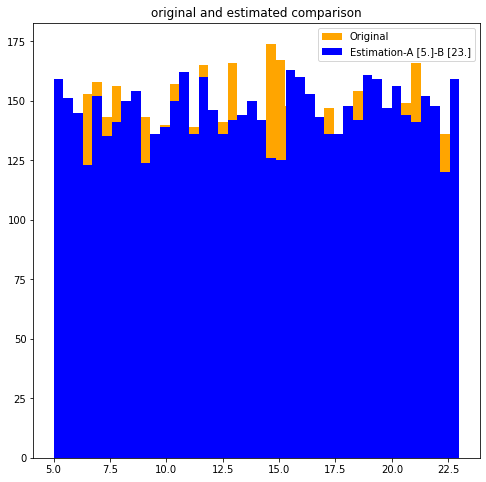

In [28]:
N =  6096 # // numero de muestras 

  #   parameter vector \theta=A,B
vectorA = np.array([1,5])
vectorB = np.array([23,30])
x3 = np.random.uniform(5,23,N) ## FDP Uniforme real   
MLE3=MFE(x3) ## TENGO MIS DATOS GUARDADOS 
A_estimate,B_estimate,uniform_estimate=MLE3.Uniform(vectorA,vectorB,N)